In [2]:
# Mengimpor library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score



### EDA

Tahapan ini melibatkan proses evaluasi kualitas data, pembersihan, transformasi, serta eksplorasi awal untuk mengidentifikasi pola dan karakteristik yang relevan dalam dataset.

In [3]:
# Load dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
# Menmpilkan 10 data terakhir
df.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
# Memeriksa struktur data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Mengubah tipe data kolom TotalCharges dari object ke float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [6]:
# Mengubah tipe data kolom SeniorCitizen menjadi object karna merupakan fitur kategorikal
df["SeniorCitizen"] = df["SeniorCitizen"].astype("O")

In [7]:
# Mengubah repsentasi variabel Churn dari 'Yes' dan 'No' menjadi 1 dan 0
df["Churn"] = df["Churn"].apply(lambda x : 1 if x == "Yes" else 0)

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [9]:
# Mengecek missing value
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
# Menghapus missng value yang ada di kolom TotalCharges
df.dropna(subset=['TotalCharges'], inplace=True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

Pada tahapan ini, kita memisahkan kolom kategorikal dan numerik untuk mempermudah proses transformasi data.  

In [12]:
# Mengelompokkan fitur kategorikal
cat_cols = [col for col in df.columns if df[col].dtypes == "O" and col != 'customerID']
print(cat_cols)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [13]:
# Mengelompokkan fitur numerik
num_cols = [col for col in df.columns if df[col].dtypes != "O" and col != 'Churn']
print(num_cols)

['tenure', 'MonthlyCharges', 'TotalCharges']


#### Univariate Analysis

Melakukan visualisasi terhadap fitur kategorikal dan numerik sekaligus untuk menganalisis hubungan masing-masing fitur dengan status churn.
Grafik di bawah ini menyajikan distribusi serta persentase pelanggan yang churn dan tidak churn pada setiap kategori atau rentang nilai fitur.

Analisis Kolom Kategorikal

In [14]:
def cat_summary(dataframe, col_name, target=None, plot=False):
    """Menampilkan rasio setiap kategori dan (opsional) distribusi target seperti 'Churn'"""
    if target:
        percent_table = pd.crosstab(dataframe[col_name], dataframe[target], normalize='index') * 100
        print(f"Persentase distribusi {target} pada '{col_name}':")
        print(percent_table.round(2))
    else:
        print(pd.DataFrame({
            col_name: dataframe[col_name].value_counts(),
            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)
        }))
    print("--------------------------------------")
    
    if plot:
        if target:
            sns.countplot(x=col_name, data=dataframe, hue=target)
            plt.title(f"Distribusi {col_name} berdasarkan {target}")
        else:
            sns.countplot(x=col_name, data=dataframe)
            plt.title(f"Countplot of {col_name}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


Persentase distribusi Churn pada 'gender':
Churn       0      1
gender              
Female  73.04  26.96
Male    73.80  26.20
--------------------------------------


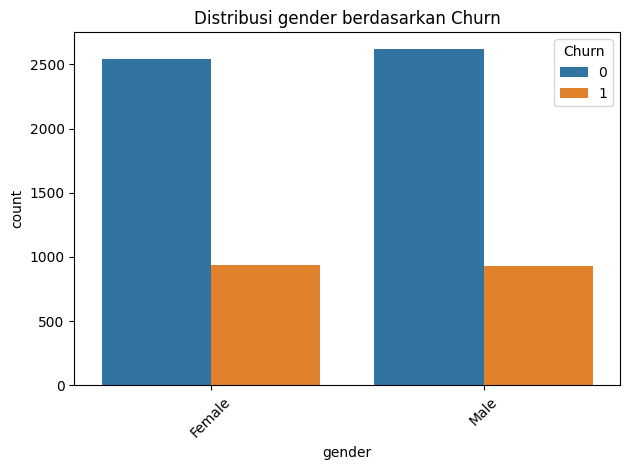

Persentase distribusi Churn pada 'SeniorCitizen':
Churn              0      1
SeniorCitizen              
0              76.35  23.65
1              58.32  41.68
--------------------------------------


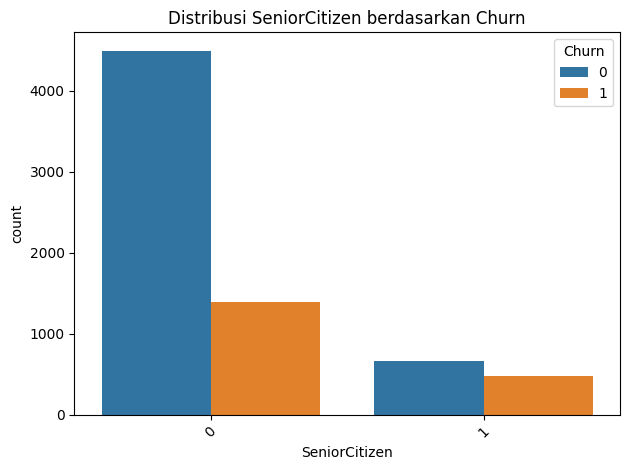

Persentase distribusi Churn pada 'Partner':
Churn        0      1
Partner              
No       67.02  32.98
Yes      80.28  19.72
--------------------------------------


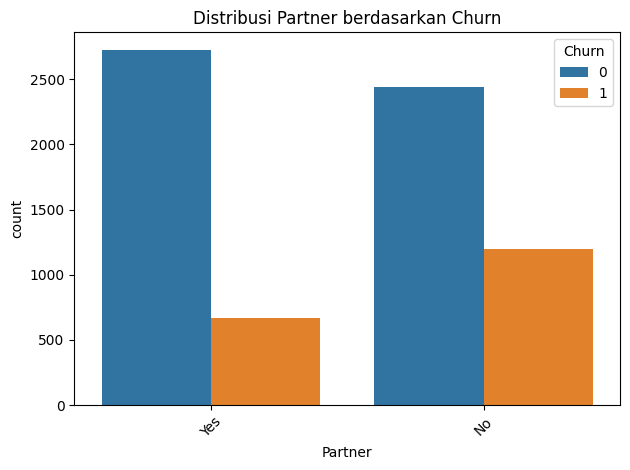

Persentase distribusi Churn pada 'Dependents':
Churn           0      1
Dependents              
No          68.72  31.28
Yes         84.47  15.53
--------------------------------------


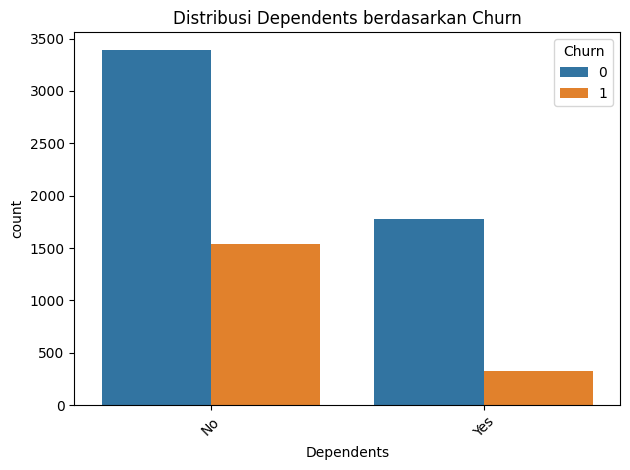

Persentase distribusi Churn pada 'PhoneService':
Churn             0      1
PhoneService              
No            75.00  25.00
Yes           73.25  26.75
--------------------------------------


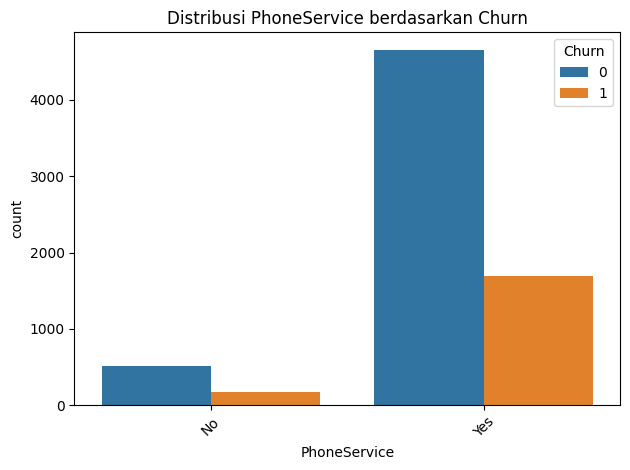

Persentase distribusi Churn pada 'MultipleLines':
Churn                 0      1
MultipleLines                 
No                74.92  25.08
No phone service  75.00  25.00
Yes               71.35  28.65
--------------------------------------


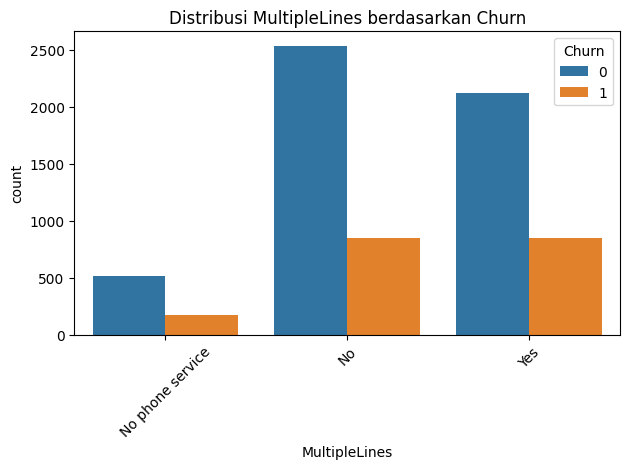

Persentase distribusi Churn pada 'InternetService':
Churn                0      1
InternetService              
DSL              81.00  19.00
Fiber optic      58.11  41.89
No               92.57   7.43
--------------------------------------


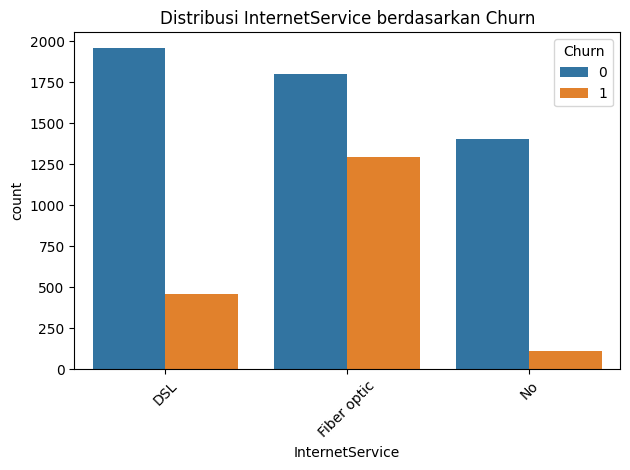

Persentase distribusi Churn pada 'OnlineSecurity':
Churn                    0      1
OnlineSecurity                   
No                   58.22  41.78
No internet service  92.57   7.43
Yes                  85.36  14.64
--------------------------------------


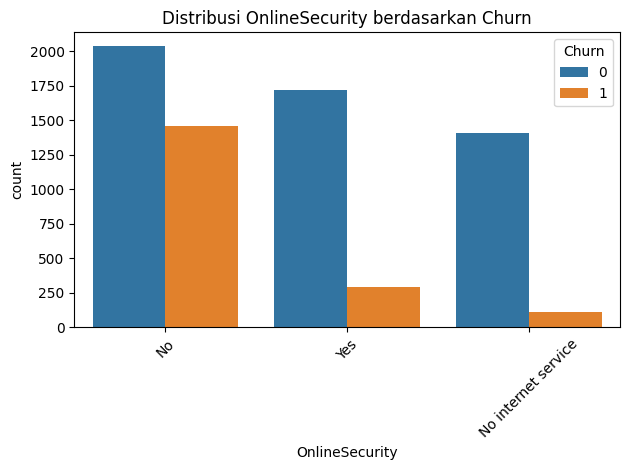

Persentase distribusi Churn pada 'OnlineBackup':
Churn                    0      1
OnlineBackup                     
No                   60.06  39.94
No internet service  92.57   7.43
Yes                  78.43  21.57
--------------------------------------


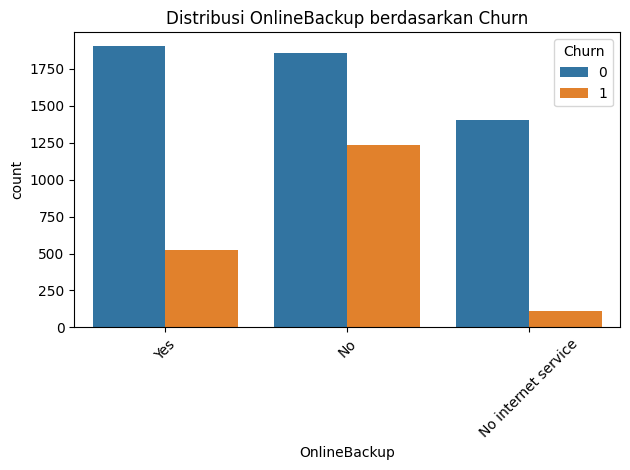

Persentase distribusi Churn pada 'DeviceProtection':
Churn                    0      1
DeviceProtection                 
No                   60.86  39.14
No internet service  92.57   7.43
Yes                  77.46  22.54
--------------------------------------


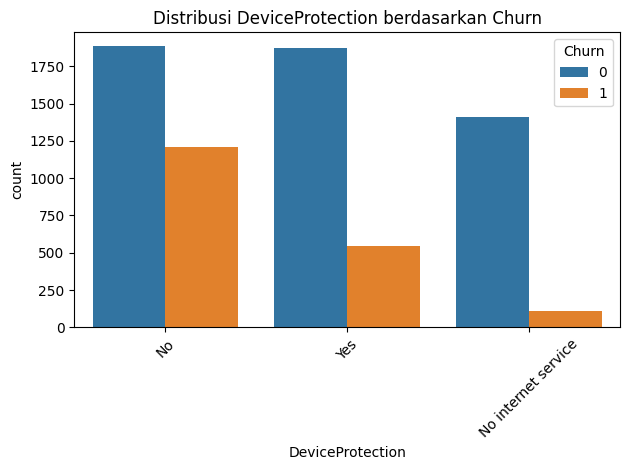

Persentase distribusi Churn pada 'TechSupport':
Churn                    0      1
TechSupport                      
No                   58.35  41.65
No internet service  92.57   7.43
Yes                  84.80  15.20
--------------------------------------


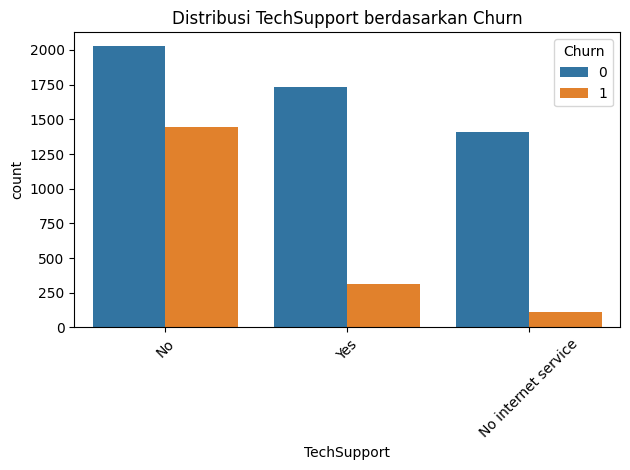

Persentase distribusi Churn pada 'StreamingTV':
Churn                    0      1
StreamingTV                      
No                   66.46  33.54
No internet service  92.57   7.43
Yes                  69.89  30.11
--------------------------------------


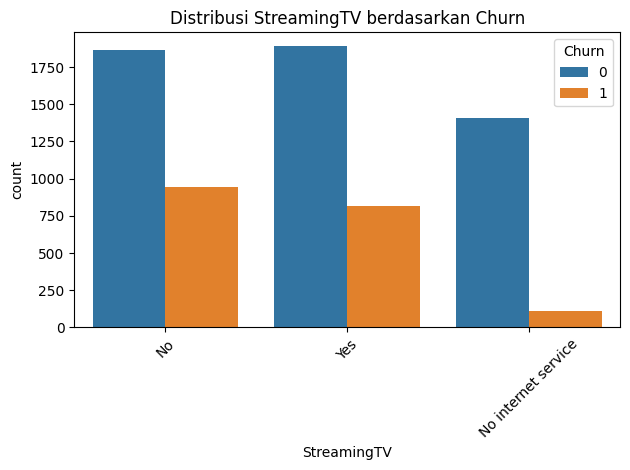

Persentase distribusi Churn pada 'StreamingMovies':
Churn                    0      1
StreamingMovies                  
No                   66.27  33.73
No internet service  92.57   7.43
Yes                  70.05  29.95
--------------------------------------


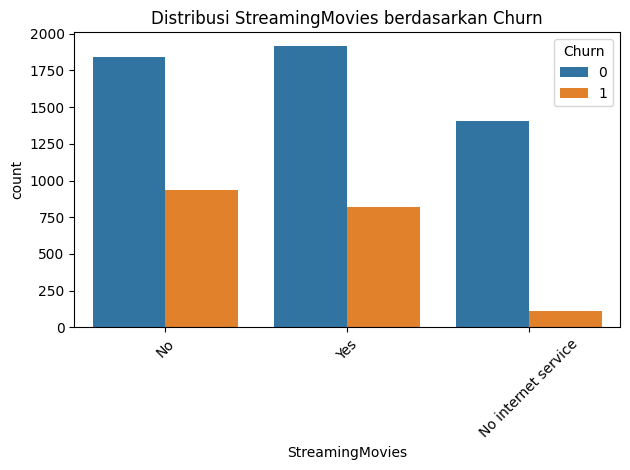

Persentase distribusi Churn pada 'Contract':
Churn               0      1
Contract                    
Month-to-month  57.29  42.71
One year        88.72  11.28
Two year        97.15   2.85
--------------------------------------


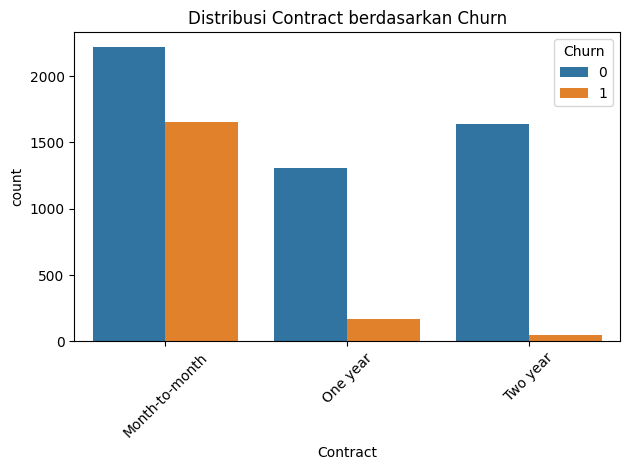

Persentase distribusi Churn pada 'PaperlessBilling':
Churn                 0      1
PaperlessBilling              
No                83.62  16.38
Yes               66.41  33.59
--------------------------------------


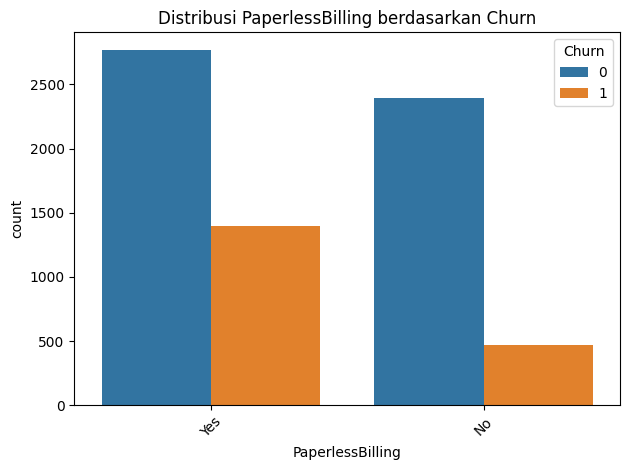

Persentase distribusi Churn pada 'PaymentMethod':
Churn                          0      1
PaymentMethod                          
Bank transfer (automatic)  83.27  16.73
Credit card (automatic)    84.75  15.25
Electronic check           54.71  45.29
Mailed check               80.80  19.20
--------------------------------------


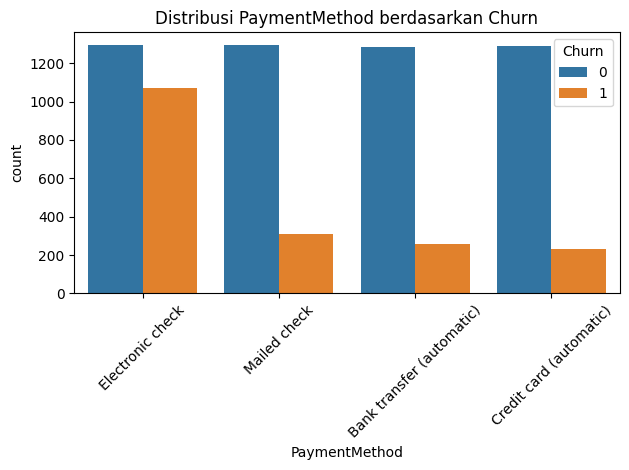

In [15]:
# Menampilkan ratio dan visualisasi dari kolom kategorikal
for col in cat_cols:
    cat_summary(df, col, target='Churn', plot=True)

Analisis Kolom Numerik

In [16]:
def plot_numeric_distributions(df, num_cols):
    """Menampilkan  visualisasi histogram dari kolom numerik"""
    for col in num_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

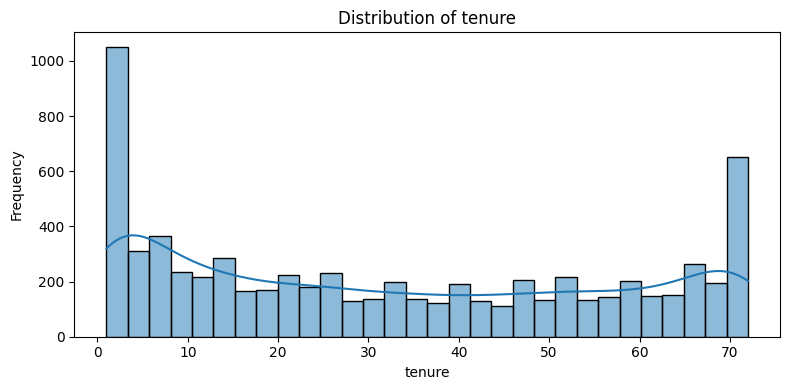

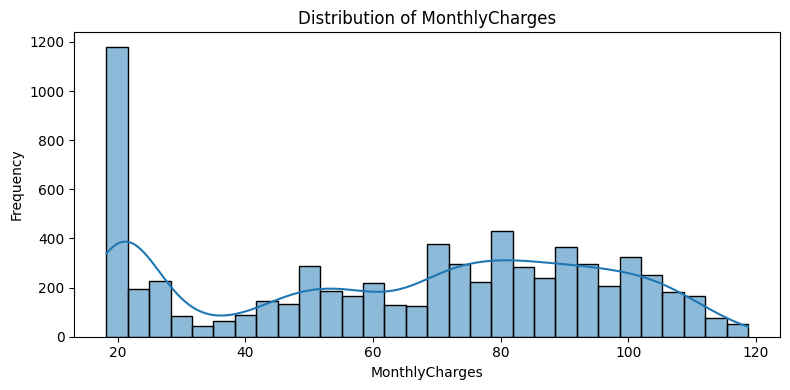

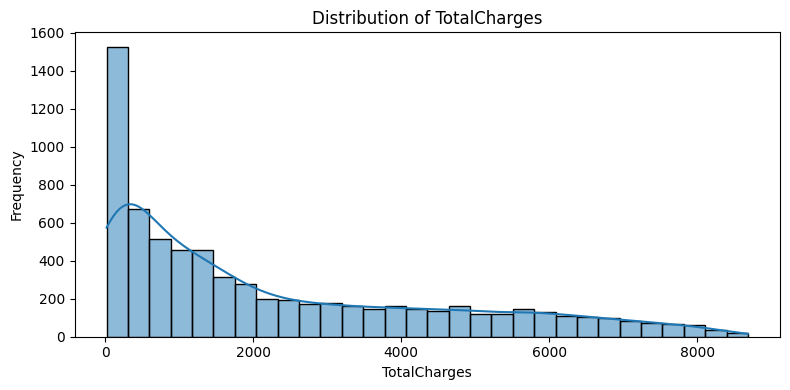

In [17]:
plot_numeric_distributions(df, num_cols)


In [18]:
# Menampilkan parameter statistik kolom numerik
df.describe()

,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,0.265785
std,24.545260,30.085974,2266.771362,0.441782
min,1.000000,18.250000,18.800000,0.000000
25%,9.000000,35.587500,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.862500,3794.737500,1.000000
max,72.000000,118.750000,8684.800000,1.000000


Analisis Korelasi

In [19]:
# Menampilkan korelasi dari kolom numerik
corr = df[num_cols].corr()
corr

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


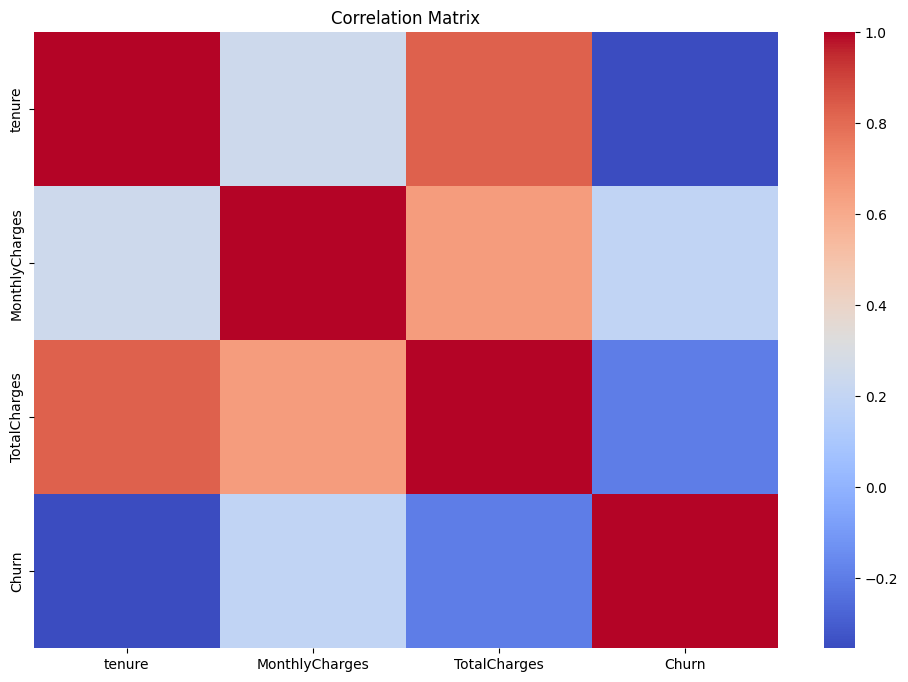

In [20]:
# Visualisasi matrix korelasi
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Heatmap korelasi digunakan untuk melihat hubungan antar fitur numerik. Fitur seperti tenure, monthly charges, dan total charges menunjukkan korelasi tertentu terhadap churn.

#### Multivariate Analysis

<Axes: xlabel='Churn', ylabel='tenure'>

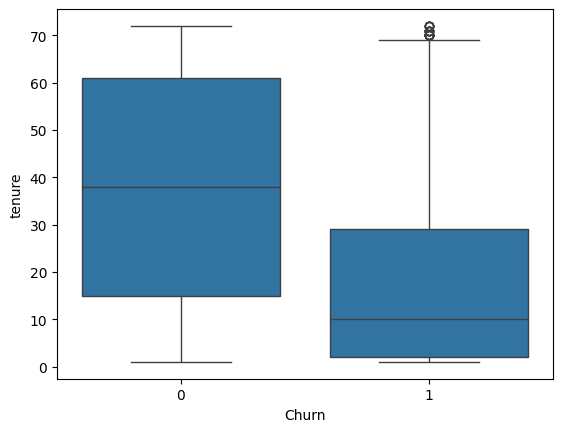

In [21]:
# Visualisasi Churn dengan tenure
sns.boxplot(x='Churn', y='tenure', data=df)


**Insight**:
- pelanggan yang churn (1) rata-rata punya tenure yang jauh lebih pendek, banyak yang kurang dari 10 bulan.
- ada beberapa pelanggan churn tapi tenure-nya panjang (outlier)
- distribusi pelanggan yang tidak churn (0) lebih panjang dan stabil

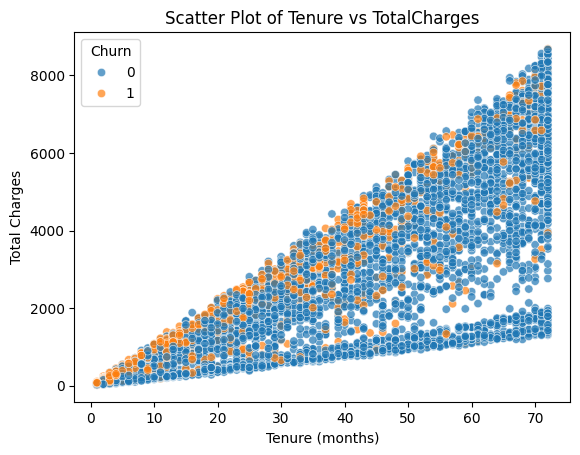

In [22]:
# Visualisasi tenure dengan TotalCharges
sns.scatterplot(data=df, x='tenure', y='TotalCharges', hue='Churn', alpha=0.7)
plt.title("Scatter Plot of Tenure vs TotalCharges")
plt.xlabel("Tenure (months)")
plt.ylabel("Total Charges")
plt.show()

**Insight**:
- tenure dan totalcharges punya hubungan positif. pola naik yang cukup jelas
- churn cenderung lebih banyak di titik dimana semakin tinggi tenure semakin naik totalcharges.
- pelanggan den tenure pendek dan total charges kecil adalah segmen paling rentan churn
- ada beberapa pelanggan yg tenure nya lama tapi bayarnya tetep kecil. mungkin faktor diskon atau ga banyak make service.

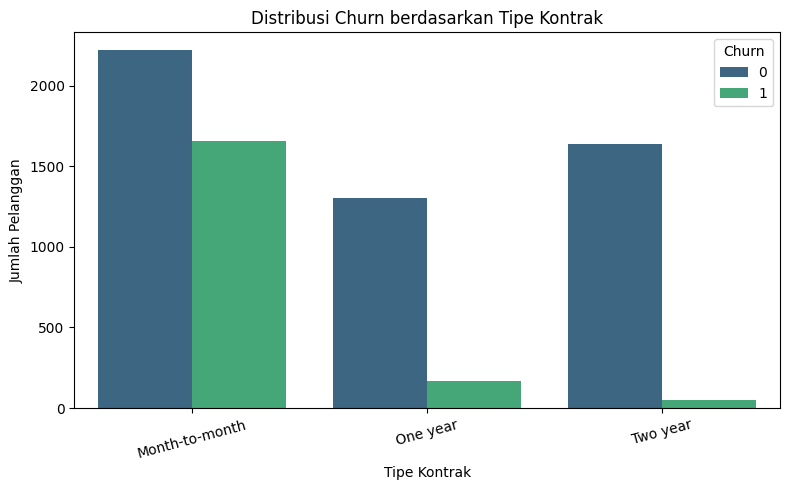

In [23]:
# Visualisasi distribusi churn dengan Contract
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Contract', hue='Churn', palette='viridis')
plt.title('Distribusi Churn berdasarkan Tipe Kontrak')
plt.xlabel('Tipe Kontrak')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Churn')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [24]:
# Melihat persentase pelanggan churn berdasarkan Tipe Contract
churn_percent = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
churn_percent = churn_percent.rename(columns={'No': 'Not Churned (%)', 'Yes': 'Churned (%)'})

print(churn_percent)

Churn                   0          1
Contract                            
Month-to-month  57.290323  42.709677
One year        88.722826  11.277174
Two year        97.151335   2.848665


**Insight**:
- pelanggan churn banyak dari karyawan month-to-month daripada tahunan

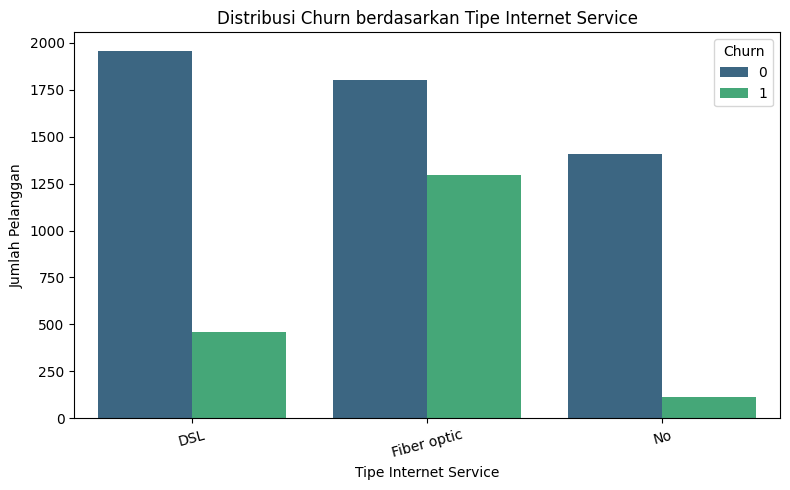

In [25]:
# Visualisasi distribusi churn dengan InternetService
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='InternetService', hue='Churn', palette='viridis')
plt.title('Distribusi Churn berdasarkan Tipe Internet Service')
plt.xlabel('Tipe Internet Service')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Churn')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

**Insight**:
- pelanggan yang pake fiber optic paling banyak churn.

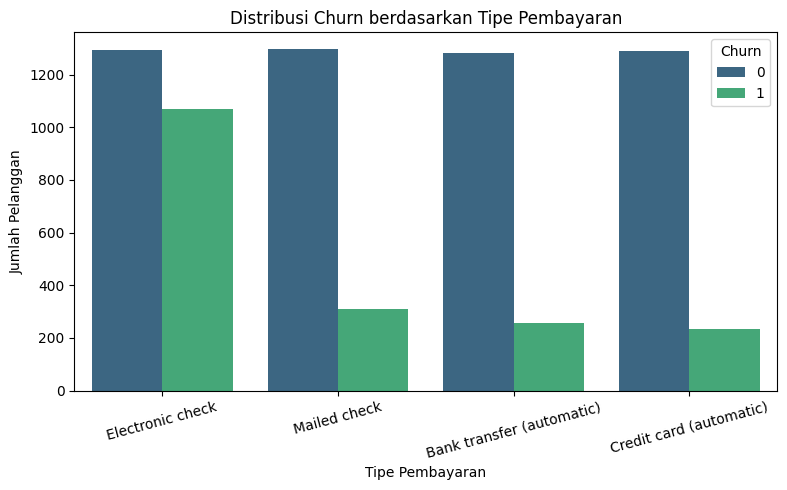

In [26]:
# Visualisasi distribusi churn dengan PaymentMethod
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='viridis')
plt.title('Distribusi Churn berdasarkan Tipe Pembayaran')
plt.xlabel('Tipe Pembayaran')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Churn')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [27]:
# Persentase Churn berdasarkan PaymentMethod
pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100


Churn,0,1
PaymentMethod,,
Bank transfer (automatic),83.268482,16.731518
Credit card (automatic),84.746877,15.253123
Electronic check,54.714588,45.285412
Mailed check,80.798005,19.201995


**Insight**:
- pelanggan yang membayar dengan electronic check lebih banyak churn. 

C:\Users\spect\AppData\Local\Temp\ipykernel_23392\12119331.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=15)
C:\Users\spect\AppData\Local\Temp\ipykernel_23392\12119331.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=15)
C:\Users\spect\AppData\Local\Temp\ipykernel_23392\12119331.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=15)


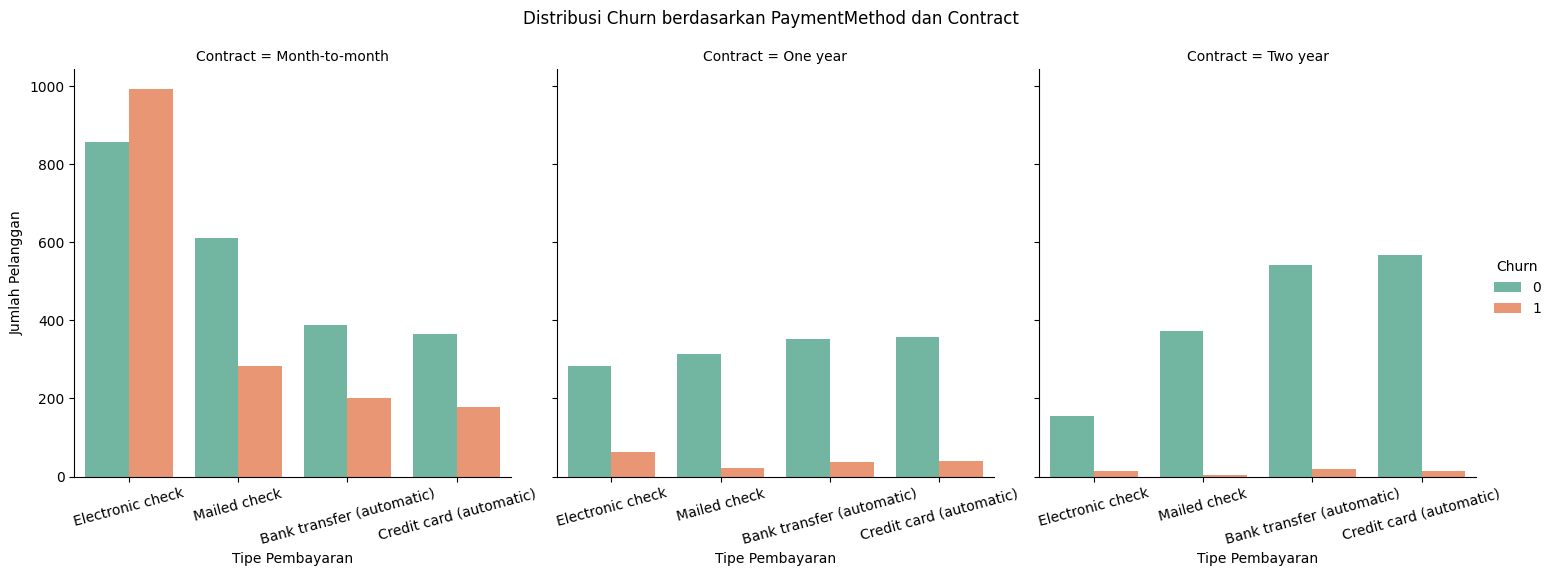

In [28]:
# Visualisasi Churn berdasarkan PaymentMethod dan Contract
g = sns.catplot(data=df, x='PaymentMethod', hue='Churn', col='Contract', kind='count', palette='Set2')
g.fig.suptitle('Distribusi Churn berdasarkan PaymentMethod dan Contract', y=1.05)
g.set_axis_labels("Tipe Pembayaran", "Jumlah Pelanggan")
g._legend.set_title('Churn')

# Rotasi label x-axis
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=15)

plt.show()


**Insight**:
- karyawan month-to-month banyak yg pake electronic check daripada karyawan tahunan. karyawan tahunan lebih keliatan loyal keliatan dari mereka bayar pake credit card atau pemabayran otomatis

### Modeling

Sebelum melakukan modeling, kita perlu melakukan data preparation untuk memastikan data siap digunakan oleh model machine learning. Tahapan yang dilakukan meliputi melakukan encoding untuk kolom kategorikal, standarisasi untuk kolom numerik, melakukan resampling jika data tidak seimbang, memisahkan fitur dan target. 

In [29]:
# Memisahkan kolom Churn dari cat_cols yang akan di encoding
cat_cols = [col for col in cat_cols if col not in ['Churn']]
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [30]:
# One-hot encoding untuk fitur kategorikal
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [31]:
df.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,0,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,5575-GNVDE,34,56.95,1889.50,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,2,53.85,108.15,1,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
3,7795-CFOCW,45,42.30,1840.75,0,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,9237-HQITU,2,70.70,151.65,1,False,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False


In [32]:
# Standarisasi pada kolom  numerik
scaler = RobustScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [33]:
df.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,-0.608696,-0.746200,-0.403038,0,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,5575-GNVDE,0.108696,-0.246891,0.145000,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,-0.586957,-0.304007,-0.379963,1,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
3,7795-CFOCW,0.347826,-0.516813,0.130633,0,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,9237-HQITU,-0.586957,0.006449,-0.367144,1,False,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False


In [34]:
# Memisahkan kolom Churn dan CustomerID dari fitur (x) dengan kolom target (y)
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

In [35]:
# Melihat jumlah data pada kolom target
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

Kita bisa melihat distribusi kelas pelanggan churn dan tidak churn ternyata tidak seimbang. Maka kita perlu melakukan oversampling pada kelas minoritas yaitu kelas churn. SMOTE digunakan untuk resampling karna SMOTE membuat data sintetis alih-alih menduplikat data yang sudah ada.

In [37]:
# Melakukan resampling dengan SMOTE 
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


c:\Users\spect\dicoding\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [38]:
# Membagi data train dan test dari hasil resampling
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)


Data dibagi menjadi data train dan test dengan proporsi 80:20 agar model dapat dievaluasi terhadap data yang belum pernah dilihatnya. 

In [39]:
# Mengecek kembali jumlah data
y_resampled.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

**Model Logistic Regression**

Membangun model logistic regression dengan parameter default di awal kemudian mencoba menemukan kombinasi parameter yang bagus untuk meningkatkan performa model menggunakan grid search. Dapat dilihat di bawah perbandingan metrik klasifikasi yang dihasilkan.

In [40]:
# Model 1: Logistic Regression
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.82      0.74      0.78      1033
           1       0.76      0.84      0.80      1033

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],  
    'solver': ['liblinear', 'saga'],
    'class_weight': ['balanced', None],
    'max_iter': [500, 1000]
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, 
                           cv=5, scoring='f1', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

# Hasil terbaik
print("Best Parameters:", grid_search.best_params_)
best_lr = grid_search.best_estimator_

# Evaluasi di test set
y_pred_best = best_lr.predict(X_test)
print("Best Logistic Regression Model:\n", classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'C': 10, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
Best Logistic Regression Model:
               precision    recall  f1-score   support

           0       0.83      0.75      0.78      1033
           1       0.77      0.84      0.80      1033

    accuracy                           0.79      2066
   macro avg       0.80      0.79      0.79      2066
weighted avg       0.80      0.79      0.79      2066



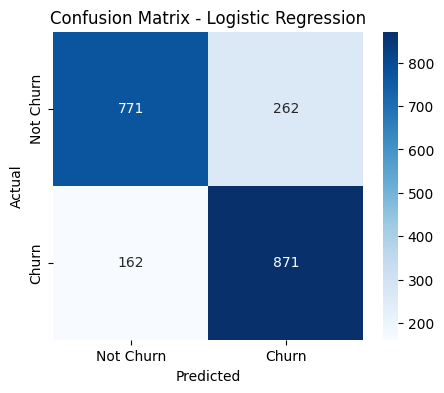

In [43]:
# Confusion matrix Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Mari kita lihat fitur-fitur yang berpengaruh terhadap churn dan tidak churn pada model logistic regression menggunakan coefficients. Semakin besar nilainya, semakin berpengaruh fitur tersebut terhadap churn dan tidak churn. 
Koefisien menggambarkan seberapa besar kontribusi suatu fitur dalam membantu model membedakan antara pelanggan yang Churn dan yang Tidak Churn.

In [56]:
coefs = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": best_lr.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

# Menampilkan fitur yang cenderung mendorong ke churn (positif koefisien)
coefs[coefs["Coefficient"] > 0]


,Feature,Coefficient
10,InternetService_Fiber optic,10.239912
7,PhoneService_Yes,4.289032
21,StreamingTV_Yes,3.943172
23,StreamingMovies_Yes,3.916371
9,MultipleLines_Yes,2.203922
17,DeviceProtection_Yes,1.855363
15,OnlineBackup_Yes,1.725921
2,TotalCharges,1.500786
13,OnlineSecurity_Yes,1.451575
19,TechSupport_Yes,1.428600


Kita bisa mengambil kesimpulan dengan melihat kembali grafik bar univariate analysis di atas untuk menganalisis lebih lanjut. Kesimpulan sementara:
- pelanggan yang menggunakan fiber optic sebagai layanan internet memiliki persentase tinggi untuk pelanggan churn.
- pelanggan lebih banyak yang menggunakan phoneservice daripada yang tidak
- banyak pelanggan yang menggunakan  layanan streaming.


**Model Random Forest**

In [44]:
# Model 2: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

Random Forest:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      1033
           1       0.82      0.86      0.84      1033

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



Mencari kombinasi parameter terbaik model random forest untuk meningkatkan performa menggunakan grid search.

In [46]:
# Parameter grid untuk dicoba
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}



# GridSearch dengan 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='f1',
                           verbose=1)

# Fit model ke data training
grid_search.fit(X_train, y_train)

# Tampilkan hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Score (f1):", grid_search.best_score_)

# Gunakan model terbaik
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Evaluasi hasilnya
from sklearn.metrics import classification_report
print("Optimized Random Forest:\n", classification_report(y_test, y_pred_best_rf))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score (f1): 0.8414425795438693
Optimized Random Forest:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83      1033
           1       0.82      0.87      0.84      1033

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



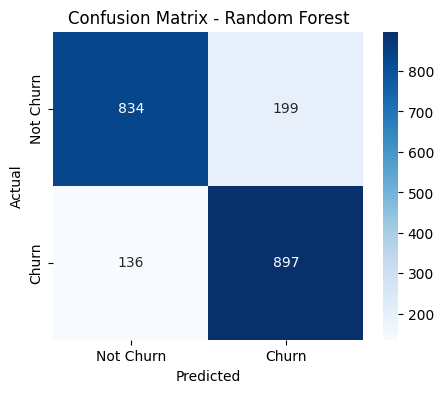

In [48]:
# Confusion matrix Random Forest
cm_rf = confusion_matrix(y_test, y_pred_best_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Tahapan selanjutnya adalah melihat fitur-fitur yang berpengaruh untuk model random forest menggunakan feature_importances_.

In [49]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title(f'Feature Importance - {model.__class__.__name__}')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig(f'importances_{model.__class__.__name__}.png')

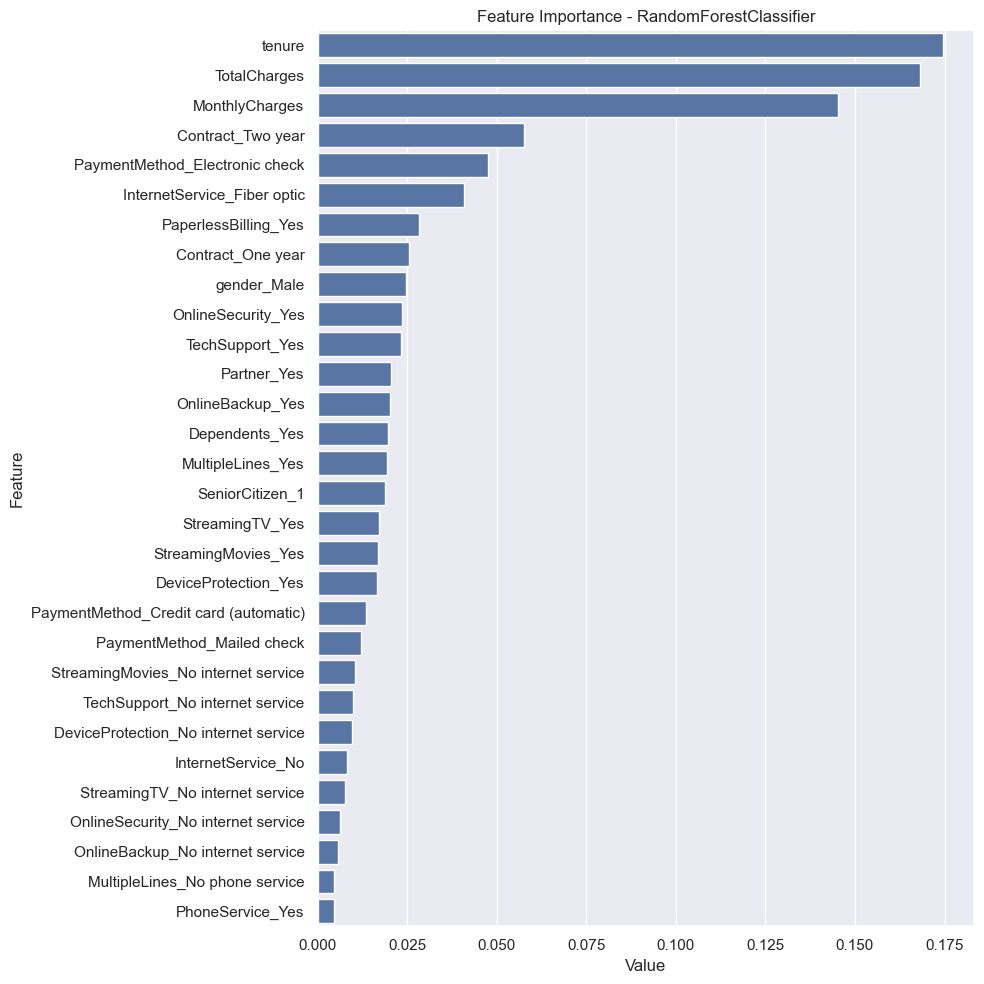

In [50]:
plot_importance(best_rf, X)

Fitur-fitur yang paling berkontribusi besar terhadap random forest adalah fitur numerik. Berbeda dengan logistic regression, fitur kategorikal justru memberikan kontribusi lebih besar terhadap model untuk membedakan pelanggan churn dan tidak churn. Ini karena logistic regression menggunakan pola linear, dan fitur kategorikal sudah kita ubah menggunakan one-hot encoding, lalu menghitung koefisien masing-masing fitur. Sedangkan random forest menggunakan gini impurity untuk menentukan fitur yang paling berkontribusi terhadap model.

Fitur-fitur yang paling berkontribusi besar pada model Random Forest cenderung berasal dari fitur numerik. Sebaliknya, pada model Logistic Regression, fitur kategorikal justru memberikan kontribusi lebih besar dalam membedakan pelanggan yang churn dan tidak churn.

Hal ini terjadi karena Logistic Regression merupakan model linear yang sangat bergantung pada representasi fitur. Fitur kategorikal telah diubah menjadi representasi numerik melalui one-hot encoding, dan model menghitung koefisien (weights) untuk masing-masing fitur, yang mencerminkan seberapa besar pengaruhnya terhadap probabilitas churn.

Sementara itu, Random Forest menentukan pentingnya fitur berdasarkan seberapa besar fitur tersebut mengurangi impurity (misalnya Gini impurity) saat membagi node dalam decision tree. Proses ini secara alami lebih peka terhadap fitur numerik yang memiliki variasi kontinu, karena dapat membagi data lebih fleksibel dibanding fitur kategorikal biner hasil one-hot.

Model random forest dipilih karna bagus dalam menangani fitur kategorikal dan numerik, mampu menangkap interaksi antar fitur dan pola non-linearitas, dan lebih robust terhadap outlier. Model ini juga memiliki recall yang tinggi. Karena kita ingin memprediksi pelanggan yang berpotensi churn. Karena dalam konteks prediksi churn, false negative (pelanggan yang akan churn tapi diprediksi tidak churn) bisa merugikan bisnis. Maka dari itu, kita ingin meminimalkan kesalahan ini dengan mengoptimalkan recall — agar sebanyak mungkin pelanggan yang berpotensi churn bisa terdeteksi dan ditindaklanjuti.



